# Part-1 : To develop your version K-Means using the algorithm
- Implemented my version of K-Means in KMeans.py file

# 1. Import required libraries
- Importing all the necessary libraries required

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from KMeans import KMeans
from sklearn.datasets import make_blobs

# 2. Input data
- These data points represent coordinates in a 2D space.
- The goal is to apply the K-Means algorithm to cluster these points into distinct groups.
- Each sublist in X corresponds to the (x, y) coordinates of an instance.
- This sample data has 8 instances for demonstration purposes.

In [21]:
X = [[0, 0], [2, 2], [0, 2], [2, 0], [10, 10], [8, 8], [10, 8], [8, 10]]

# 3. Applying K-Means Clustering
- Initializing a KMeans object with k=2, indicating the desired number of clusters.
- Performing K-Means clustering on the dataset X.
- The result includes cluster labels assigned to each data point (cluster_labels)
  and the coordinates of the cluster centroids (centroids).

In [22]:
kmeans = KMeans(k=2) 
labels, centroids = kmeans.fit(X)

# 4. Expected output
- Printing the expected cluster labels for the given dataset X.
- Printing the expected coordinates of cluster centroids after K-Means clustering.

In [23]:
expected_labels = [0, 0, 0, 0, 1, 1, 1, 1]
expected_centroids = [[1, 1], [9, 9]]
print("Expected lables:", expected_labels)
print("Expected centroids:", expected_centroids)

Expected lables: [0, 0, 0, 0, 1, 1, 1, 1]
Expected centroids: [[1, 1], [9, 9]]


# Part-2 : Performance Analysis

# 1. Generating My Cluster Assignments
- Using make_blobs to generate 700 instances of data points with 4 clusters in 2-dimensional space.
- Parameters: n_samples=700 (number of instances), centers=4 (number of clusters),
  cluster_std=0.60 (standard deviation of each cluster), random_state=0 (seed for reproducibility).
- Displaying the generated data points in X.

In [24]:
X, My_cluster_assignments = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0)
X

array([[-0.84177847,  7.86655225],
       [-1.21515296,  8.01484649],
       [ 1.84320847, -0.07222085],
       ...,
       [-1.83141457,  2.2867542 ],
       [-1.84639796,  3.30491543],
       [ 0.28256062,  4.77250619]])

# 2. Printing cluster_assignments

In [25]:
My_cluster_assignments

array([3, 3, 1, 3, 1, 3, 1, 1, 1, 3, 0, 1, 3, 1, 2, 0, 0, 3, 1, 3, 1, 1,
       2, 1, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 1, 3, 3, 1, 1, 0, 0, 1, 1, 2,
       1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 0, 2, 1, 3, 0, 1, 2, 1, 2, 2, 3, 0,
       1, 2, 1, 1, 3, 1, 3, 3, 1, 2, 2, 0, 0, 0, 2, 2, 2, 1, 1, 3, 0, 2,
       0, 2, 3, 3, 0, 3, 3, 3, 2, 1, 3, 3, 3, 1, 2, 2, 1, 1, 1, 0, 0, 2,
       1, 0, 0, 1, 0, 0, 3, 3, 2, 2, 0, 1, 2, 3, 2, 3, 3, 2, 1, 3, 2, 3,
       2, 1, 0, 3, 3, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 3, 2, 1, 0, 2, 0, 1,
       0, 3, 3, 1, 0, 2, 3, 0, 0, 2, 3, 3, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 2, 3, 1, 0, 0, 3, 2, 2,
       2, 0, 1, 1, 1, 3, 0, 0, 2, 2, 1, 3, 1, 3, 2, 3, 0, 0, 0, 3, 1, 1,
       0, 3, 1, 3, 3, 2, 0, 1, 1, 0, 3, 3, 3, 3, 0, 2, 3, 1, 1, 3, 0, 3,
       3, 0, 0, 1, 1, 0, 1, 2, 2, 2, 3, 1, 2, 0, 3, 0, 3, 3, 3, 2, 0, 2,
       2, 3, 3, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 3, 0, 1, 1, 1, 0, 3, 0, 0,
       1, 3, 3, 1, 1, 2, 1, 1, 3, 0, 1, 3, 2, 0, 0,

# 3. My custom KMeans implementation
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the coordinates of cluster centroids after clustering.

In [26]:
kmeans = KMeans(k=4)
labels, centroids = kmeans.fit(X)
centroids

[[-1.6069214533426293, 7.449994166159895],
 [-0.30656092379506766, 3.620140429926713],
 [1.9890377775223884, 0.8591693620979796],
 [-0.9224445996223682, 8.10898685167611]]

# 4.Scikit-learn KMeans implementation
- Importing necessary library
- Applying K-Means clustering with k=4 to the dataset X.
- Displaying the kmeans_sklearn after clustering.

In [28]:
from sklearn.cluster import KMeans
kmeans_sklearn = KMeans(n_clusters=4, random_state=0)
sklearn_cluster_assignments = kmeans_sklearn.fit_predict(X)

#  Comparison of Cluster Assignments: Custom KMeans vs. Scikit-learn KMeans vs. Actual Clusters
- Creating a 12x4 figure.
- Setting up a 1x3 grid.
- Actual clusters, color-coded by My_cluster_assignments.
- My KMeans clusters, color-coded by your custom assignments.
- Scikit-learn KMeans clusters, color-coded by scikit-learn assignments.
- Displaying the figure with three subplots.

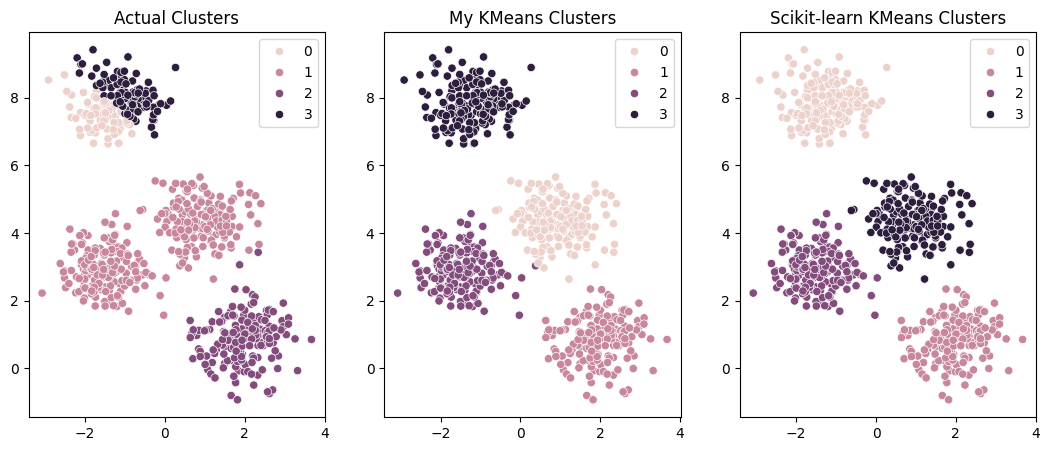

In [29]:

plt.figure(figsize=(13, 5))

plt.subplot(1, 3, 1)
#plt.scatter(X[:, 0], X[:, 1], c= My_cluster_assignments, cmap='plasma', edgecolor='k', label='Actual Clusters')
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels)
plt.title('Actual Clusters')
plt.legend()

plt.subplot(1, 3, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=My_cluster_assignments)
plt.title('My KMeans Clusters')
plt.legend()

plt.subplot(1, 3, 3)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=sklearn_cluster_assignments)
plt.title('Scikit-learn KMeans Clusters')
plt.legend()


plt.show()


# 5. Comparison of Cluster Assignments

In [31]:
comparison_my_vs_actual = np.sum(My_cluster_assignments == labels) / len(labels)
comparison_my_vs_sklearn = np.sum(My_cluster_assignments == sklearn_cluster_assignments) / len(sklearn_cluster_assignments)

print(f"Comparison (My KMeans vs Actual): {comparison_my_vs_actual:.2%}")
print(f"Comparison (My KMeans vs Scikit-learn KMeans): {comparison_my_vs_sklearn:.2%}")

Comparison (My KMeans vs Actual): 14.71%
Comparison (My KMeans vs Scikit-learn KMeans): 49.86%


# 6. V-Measure Comparison Between Custom K-Means and Scikit-Learn K-Means
- Calculating and printing the V-Measure scores and a metric for clustering evaluation
- Comparing the clustering results of a custom K-Means implementation 

In [35]:
from sklearn.metrics import v_measure_score
v_measure_my_kmeans = v_measure_score(My_cluster_assignments, labels)
v_measure_sklearn_kmeans = v_measure_score(My_cluster_assignments,sklearn_cluster_assignments)
print(f'V-Measure (My custom K-Means): {v_measure_my_kmeans}')
print(f'V-Measure (Scikit-Learn K-Means): {v_measure_sklearn_kmeans}')

V-Measure (My custom K-Means): 0.7900928535751308
V-Measure (Scikit-Learn K-Means): 0.993647196794607


# Part-3.1 : Demonstration of Clustering Algorithms on Chicago Dataset

In [36]:
chicago_taxi_df = pd.read_csv('Taxi_Trips__2013-2023_.csv')